# I. Exploring Feature Selection Using Train Dataset

### Importing Libraries and Data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = pd.read_csv("train.csv")
X = data.iloc[:,0:20] #independent columns
y = data.iloc[:,-1] #target column i.e price range

### Feature Selection Using Chi-Squared Test

In [ ]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] #naming the dataframe columns
print(featureScores.nlargest(10,'Score')) #print 10 best features

### Feature Importance Using ExtraTreesClassifier

In [ ]:
X = data.iloc[:,0:20] #independent columns
y = data.iloc[:,-1] #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### Correlation Matrix Heatmap

In [ ]:
import seaborn as sns
X = data.iloc[:,0:20] #independent columns
y = data.iloc[:,-1] #target column i.e price range
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# II. Model Development Using Glass Dataset
### 1. Data Exploration
- Load the dataset using `pandas`
- Inspect data types, structure, and missing values

In [ ]:
import pandas as pd

#Load the dataset
df = pd.read_csv('glass.csv')

#Display the first few rows
print("First 5 rows of the dataset:")
print(df.head())

#Check the shape of the dataset
print("\nDataset shape (rows, columns):", df.shape)

#Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

#Check for duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())
print(df.iloc[:, -1].value_counts())

### 2. Data Preprocessing
- **Data Cleaning:** Handle missing values if any, fix anomalies
- **Data Transformation:** Normalize or standardize the features if necessary

NEED BA MAG PRE PROCESS????

In [5]:
# data_preprocessing.py
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load dataset WITHOUT headers
column_names = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'GlassType']
glass = pd.read_csv('glass.csv', header=None, names=column_names)

# Handle duplicates
initial_count = len(glass)
glass = glass.drop_duplicates()
print(f"Removed {initial_count - len(glass)} duplicate rows")
print(f"New shape: {glass.shape}")

# Check data types
print("\nChecking data types:")
print(glass.dtypes)

# Convert all feature columns to numeric
feature_cols = glass.columns[:-1]
glass[feature_cols] = glass[feature_cols].apply(pd.to_numeric, errors='coerce')

# Check for missing values
print("\nMissing values after conversion:")
print(glass.isnull().sum())

# Drop rows with missing data
glass = glass.dropna()
print(f"\nShape after dropping missing values: {glass.shape}")

# Remove outliers using IQR method
def remove_outliers(df, columns):
    clean_df = df.copy()
    for col in columns:
        Q1 = clean_df[col].quantile(0.25)
        Q3 = clean_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        clean_df = clean_df[(clean_df[col] >= lower_bound) & (clean_df[col] <= upper_bound)]
    return clean_df

initial_rows = len(glass)
glass = remove_outliers(glass, feature_cols)
print(f"\nRemoved {initial_rows - len(glass)} outlier rows")
print(f"New shape after outlier removal: {glass.shape}")

# Remove constant features BEFORE scaling
constant_features = []
for col in feature_cols:
    if glass[col].nunique() == 1:  # Check if feature has only one unique value
        constant_features.append(col)

if constant_features:
    print(f"\nRemoving constant features: {constant_features}")
    glass = glass.drop(columns=constant_features)
    feature_cols = [col for col in feature_cols if col not in constant_features]

# Separate features and target
X = glass[feature_cols]
y = glass['GlassType']  # Should be intact

# Scale features only
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=feature_cols, index=X.index)

# Combine scaled features with target
preprocessed = pd.concat([X_scaled, y], axis=1)

# Save
preprocessed.to_csv('preprocessed_glass.csv', index=False)
print("\nPreprocessed data saved to 'preprocessed_glass.csv'")

# Diagnostics
print("\nFirst 5 rows of preprocessed data:")
print(preprocessed.head())
print(f"\nFinal features: {feature_cols}")

Removed 1 duplicate rows
New shape: (214, 10)

Checking data types:
RI           object
Na           object
Mg           object
Al           object
Si           object
K            object
Ca           object
Ba           object
Fe           object
GlassType    object
dtype: object

Missing values after conversion:
RI           1
Na           1
Mg           1
Al           1
Si           1
K            1
Ca           1
Ba           1
Fe           1
GlassType    0
dtype: int64

Shape after dropping missing values: (213, 10)

Removed 109 outlier rows
New shape after outlier removal: (104, 10)

Removing constant features: ['Ba']

Preprocessed data saved to 'preprocessed_glass.csv'

First 5 rows of preprocessed data:
         RI        Na        Mg        Al        Si         K        Ca  \
2  0.292266  2.265044  0.409689 -0.123542 -0.234911 -1.548993 -1.623524   
3 -1.134714  1.234503  0.186612  0.848185  0.475602 -2.877917 -1.766445   
4  0.342160  0.318466  0.811226 -0.501436 -0.562840 -0

### 3. Model
- **Ung model yes**


a. Top 5 features (Univariate Selection):
  Feature    F_Value
6      Ca  11.392931
3      Al  10.664570
4      Si   6.065513
0      RI   4.794891
2      Mg   2.492662

b. Top 5 features (Feature Importance):
  Feature  Importance
0      RI    0.193597
3      Al    0.151676
2      Mg    0.136847
6      Ca    0.136803
4      Si    0.115967

c. Top 5 features (Correlation):
  Feature  Correlation
6      Ca     0.423590
3      Al     0.412776
0      RI     0.288943
4      Si     0.270467
2      Mg     0.215796


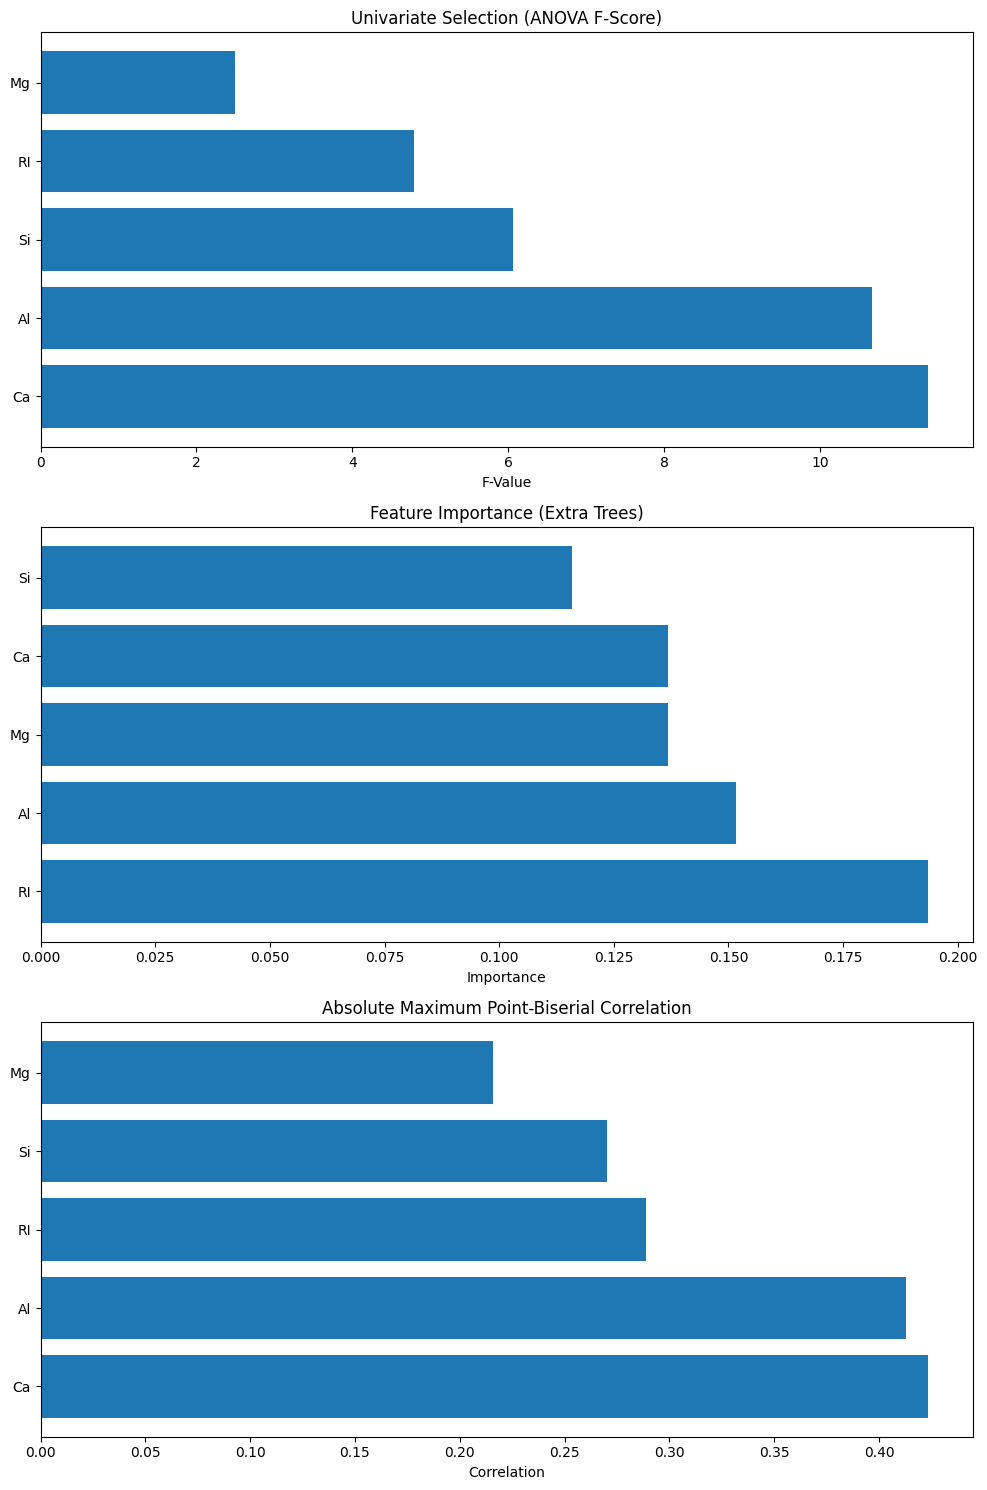

In [6]:
# model_development.py
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import ExtraTreesClassifier
from scipy.stats import pointbiserialr
import matplotlib.pyplot as plt

# Load preprocessed data
data = pd.read_csv('preprocessed_glass.csv')
X = data.drop('GlassType', axis=1)
y = data['GlassType']

# a. Univariate Selection
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)
univariate_scores = pd.DataFrame({
    'Feature': X.columns,
    'F_Value': selector.scores_
}).sort_values('F_Value', ascending=False)

top_5_univariate = univariate_scores.head(5)['Feature'].tolist()
print("\na. Top 5 features (Univariate Selection):")
print(univariate_scores.head(5))

# b. Feature Importance
model = ExtraTreesClassifier(random_state=10)
model.fit(X, y)
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

top_5_importance = importance.head(5)['Feature'].tolist()
print("\nb. Top 5 features (Feature Importance):")
print(importance.head(5))

# c. Correlation
correlation_results = []
for feature in X.columns:
    max_abs_corr = 0
    for cls in y.unique():
        binary_target = (y == cls).astype(int)
        corr, _ = pointbiserialr(binary_target, X[feature])
        if not np.isnan(corr):
            max_abs_corr = max(max_abs_corr, abs(corr))
    correlation_results.append(max_abs_corr)

correlation_df = pd.DataFrame({
    'Feature': X.columns,
    'Correlation': correlation_results
}).sort_values('Correlation', ascending=False)

top_5_correlation = correlation_df.head(5)['Feature'].tolist()
print("\nc. Top 5 features (Correlation):")
print(correlation_df.head(5))

# Visualization
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Univariate
axes[0].barh(univariate_scores.head(5)['Feature'], univariate_scores.head(5)['F_Value'])
axes[0].set_title('Univariate Selection (ANOVA F-Score)')
axes[0].set_xlabel('F-Value')

# Feature Importance
axes[1].barh(importance.head(5)['Feature'], importance.head(5)['Importance'])
axes[1].set_title('Feature Importance (Extra Trees)')
axes[1].set_xlabel('Importance')

# Correlation
axes[2].barh(correlation_df.head(5)['Feature'], correlation_df.head(5)['Correlation'])
axes[2].set_title('Absolute Maximum Point-Biserial Correlation')
axes[2].set_xlabel('Correlation')

plt.tight_layout()
plt.savefig('feature_selection_results.png')
plt.show()


Evaluating model with: All Features
Mean Accuracy: 0.7083 ± 0.1239

Evaluating model with: Univariate Selection
Mean Accuracy: 0.7333 ± 0.0687

Evaluating model with: Feature Importance
Mean Accuracy: 0.7333 ± 0.0687

Evaluating model with: Correlation
Mean Accuracy: 0.7333 ± 0.0687

Final Results:
            Feature Set  Mean Accuracy  Std Accuracy
0          All Features       0.708333      0.123884
1  Univariate Selection       0.733333      0.068718
2    Feature Importance       0.733333      0.068718
3           Correlation       0.733333      0.068718

Using 'Correlation' feature set for final evaluation: ['Ca', 'Al', 'RI', 'Si', 'Mg']

Classification Report for Correlation Features:
              precision    recall  f1-score   support

           1       0.71      0.56      0.62         9
           2       0.64      0.70      0.67        10
           3       0.33      0.50      0.40         2

    accuracy                           0.62        21
   macro avg       0.56    

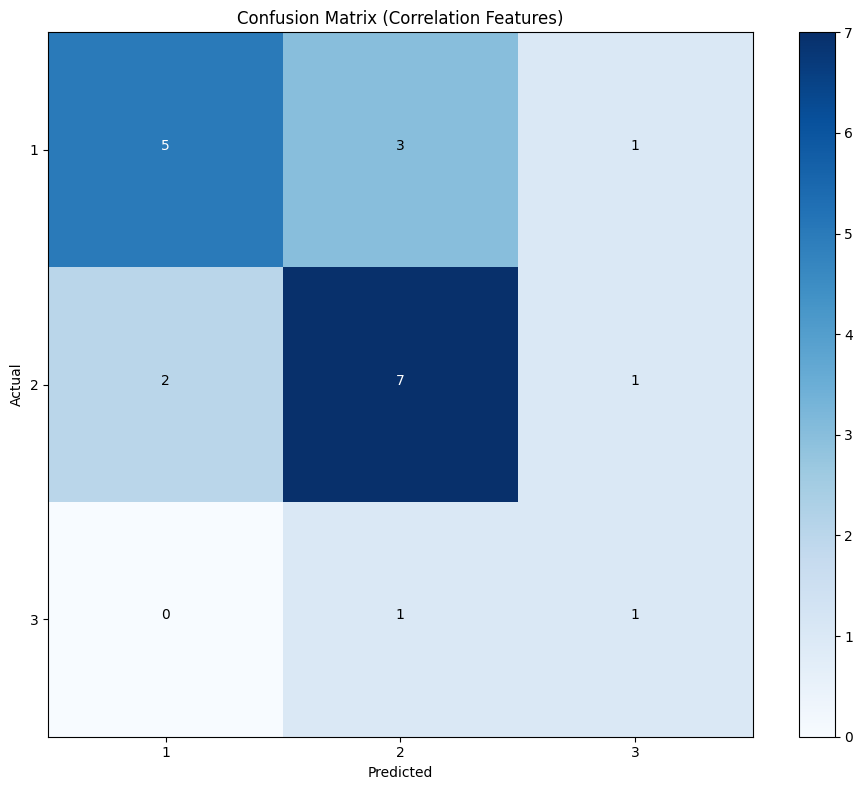

In [8]:
# model_evaluation.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Load preprocessed data
df = pd.read_csv('preprocessed_glass.csv')
X = df.drop('GlassType', axis=1)
y = df['GlassType']

# Feature sets from previous selection
feature_sets = {
    'All Features': X.columns.tolist(),
    'Univariate Selection': ['Ca', 'Al', 'Si', 'RI', 'Mg'],
    'Feature Importance': ['RI', 'Al', 'Mg', 'Ca', 'Si'],
    'Correlation': ['Ca', 'Al', 'RI', 'Si', 'Mg']
}

# Fixed manual cross-validation
def manual_cross_validation(X, y, feature_set, n_splits=8, test_size=0.2, random_state=10):
    np.random.seed(random_state)
    n_samples = len(X)
    test_size_int = max(1, int(n_samples * test_size))  # Ensure at least 1 sample
    indices = np.arange(n_samples)
    np.random.shuffle(indices)

    accuracies = []

    for i in range(n_splits):
        # Create proper test indices
        test_start = i * test_size_int
        test_end = min((i + 1) * test_size_int, n_samples)
        test_indices = indices[test_start:test_end]

        # Create train indices (all except test)
        train_indices = np.concatenate([indices[:test_start], indices[test_end:]])

        # Ensure we have samples in both sets
        if len(train_indices) == 0 or len(test_indices) == 0:
            continue

        # Get data subsets
        X_train = X.iloc[train_indices][feature_set]
        X_test = X.iloc[test_indices][feature_set]
        y_train = y.iloc[train_indices]
        y_test = y.iloc[test_indices]

        # Train and evaluate model
        model = GaussianNB()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))

    return np.mean(accuracies), np.std(accuracies)

# Train and evaluate models
results = []
for feature_name, features in feature_sets.items():
    print(f"\nEvaluating model with: {feature_name}")
    mean_acc, std_acc = manual_cross_validation(X, y, features)
    results.append({
        'Feature Set': feature_name,
        'Mean Accuracy': mean_acc,
        'Std Accuracy': std_acc
    })
    print(f"Mean Accuracy: {mean_acc:.4f} ± {std_acc:.4f}")

# Display results
results_df = pd.DataFrame(results)
print("\n" + "="*50)
print("Final Results:")
print("="*50)
print(results_df[['Feature Set', 'Mean Accuracy', 'Std Accuracy']])

#CORRELATION feature set for final evaluation
correlation_features = feature_sets['Correlation']
print(f"\nUsing 'Correlation' feature set for final evaluation: {correlation_features}")
X_corr = X[correlation_features]

# Final train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_corr, y, test_size=0.2, random_state=10, stratify=y
)

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\nClassification Report for Correlation Features:")
print(classification_report(y_test, y_pred))

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix (Correlation Features)')
plt.colorbar()

classes = sorted(y.unique())
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > cm.max()/2 else "black")

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()